In [1]:
import numpy as np
import pandas as pd

df2=pd.read_csv('soyang3.csv',index_col=0, header=0)
df1=pd.read_csv('soyangpre.csv',index_col=0, header=0)

In [2]:
df1.describe()

,prec
count,1096.000000
mean,3.273723
std,10.510661
min,0.000000
25%,0.000000
50%,0.000000
75%,0.925000
max,103.200000


In [3]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [6]:
adf_test(df1['prec'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.211313e+00
p-value                 5.499029e-08
# lags used             1.100000e+01
# observations          1.084000e+03
critical value (1%)    -3.436397e+00
critical value (5%)    -2.864210e+00
critical value (10%)   -2.568192e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
adf_test(df2['q'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.237035e+00
p-value                 4.797608e-08
# lags used             1.200000e+01
# observations          1.083000e+03
critical value (1%)    -3.436403e+00
critical value (5%)    -2.864212e+00
critical value (10%)   -2.568193e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
len(df2)

1096

In [10]:
# Set four weeks for testing
train = df2.iloc[:822]
test = df2.iloc[822:]

In [11]:
train2 = df1.iloc[:822]
test2 = df1.iloc[822:]

In [14]:
model = SARIMAX(train['q'],exog=train2['prec'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\min\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\min\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\min\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -5215.826
Date:                                Wed, 28 Sep 2022   AIC                          10449.651
Time:                                        14:57:07   BIC                          10492.057
Sample:                                    01-01-2019   HQIC                         10465.920
                                         - 04-01-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
prec           7.8329      0.229     34.261      0.000       7.385       8.281
ar.L1          0.4751      0.123      3.869      0.000       0.234       0.716
ar.L2          0.4587      0.108      4.259      0.000       0.248       0.670
ma.L1          0.0120      0.122      0.098      0.922      -0.227       0.251
ma.L2         -0.4188      0.055     -7.591      0.000      -0.527      -0.311
ma.L3         -0.2489      0.033     -7.470      0.000      -0.314      -0.184
ma.S.L7       -0.0233      0.054     -0.429      0.668      -0.130       0.083
ma.S.L14      -0.0771      0.049     -1.561      0.119      -0.174       0.020
sigma2      2.032e+04    305.757     66.446      0.000    1.97e+04    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            559154.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.57   Skew:                             8.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
exog_forecast = df2[822:][['q']]
fcast = results.predict(len(train),len(train)+273,exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Forecast')

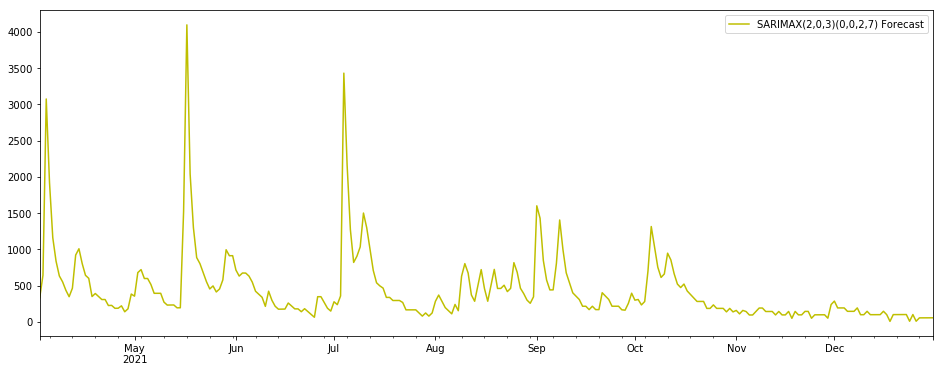

In [17]:
fcast.plot(legend=True,figsize=(16,6),c='y')

In [19]:
fcast.to_csv("fcast2.csv", index=False)

In [20]:
fcast

2021-04-02     331.009291
2021-04-03     641.929378
2021-04-04    3072.786663
2021-04-05    1919.019679
2021-04-06    1159.284922
                 ...     
2021-12-27      54.132947
2021-12-28      54.383593
2021-12-29      54.524580
2021-12-30      54.806558
2021-12-31      55.002375
Freq: D, Name: SARIMAX(2,0,3)(0,0,2,7) Forecast, Length: 274, dtype: float64

In [14]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['q'], predictions)
error2 = rmse(test['q'], predictions)

print(f'SARIMA(2,0,3)(0,0,2,7) MSE Error: {error1:11.10}')
print(f'SARIMA(2,0,3)(0,0,2,7) RMSE Error: {error2:11.10}')

SARIMA(2,0,3)(0,0,2,7) MSE Error: 6203.648901
SARIMA(2,0,3)(0,0,2,7) RMSE Error: 78.76324588


In [16]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test2[['prec']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Predictions')

In [17]:
print(f'SARIMA(2,0,3)(0,0,2,7) MSE Error: {error1:11.10}')
print(f'SARIMA(2,0,3)(0,0,2,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['q'], predictions)
error2x = rmse(test['q'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(2,0,3)(0,0,2,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(2,0,3)(0,0,2,7) RMSE Error: {error2x:11.10}')

SARIMA(2,0,3)(0,0,2,7) MSE Error: 6203.648901
SARIMA(2,0,3)(0,0,2,7) RMSE Error: 78.76324588

SARIMAX(2,0,3)(0,0,2,7) MSE Error: 6659.276962
SARIMAX(2,0,3)(0,0,2,7) RMSE Error: 81.60439303


In [23]:
model = SARIMAX(df2['q'],exog=df1['prec'],order=(2,0,3),seasonal_order=(0,0,2,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df1[822:][['prec']]
fcast = results.predict(len(train),len(train)+273,exog=exog_forecast).rename('SARIMAX(2,0,3)(0,0,2,7) Forecast')

In [24]:
fcast

2021-04-02     37.054619
2021-04-03    309.960951
2021-04-04    -69.489373
2021-04-05    206.762977
2021-04-06    163.221437
                 ...    
2021-12-27      5.090246
2021-12-28      5.918526
2021-12-29      9.170343
2021-12-30      4.560333
2021-12-31      6.907501
Freq: D, Name: SARIMAX(2,0,3)(0,0,2,7) Forecast, Length: 274, dtype: float64

In [25]:
test['q']

date
2021-04-02     38.120
2021-04-03     78.457
2021-04-04    389.262
2021-04-05    242.339
2021-04-06    145.385
               ...   
2021-12-27      6.911
2021-12-28      6.943
2021-12-29      6.961
2021-12-30      6.997
2021-12-31      7.022
Name: q, Length: 274, dtype: float64

NameError: name 'ax' is not defined

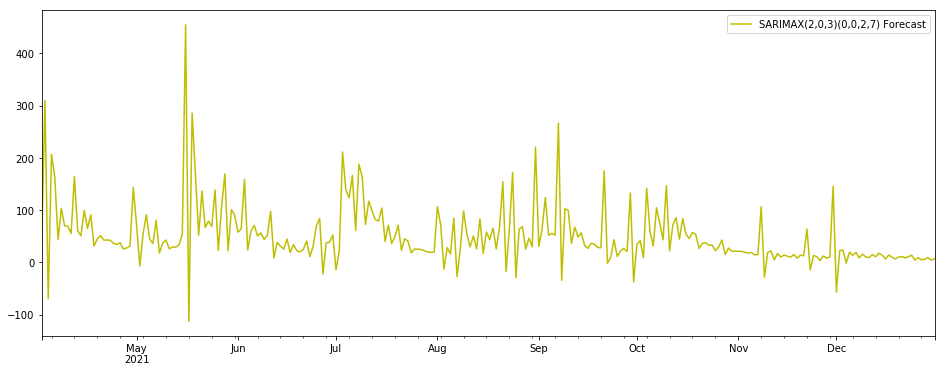

In [27]:
fcast.plot(legend=True,figsize=(16,6),c='y')
ax.autoscale(axis='x',tight=True)

NameError: name 'ax' is not defined

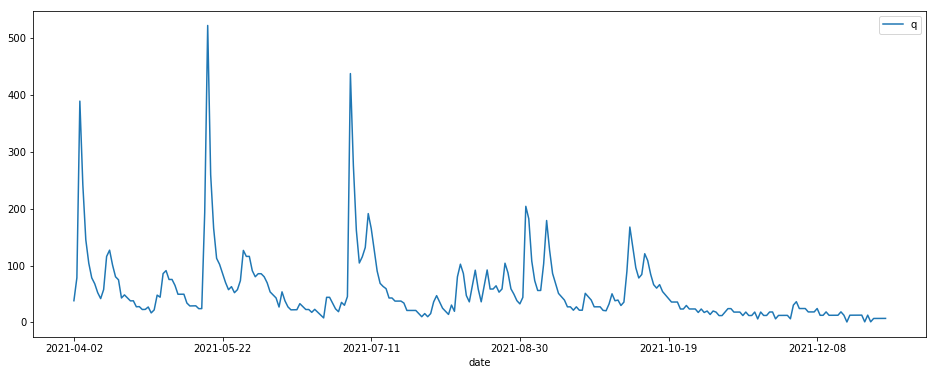

In [28]:
test['q'].plot(legend=True,figsize=(16,6))
ax.autoscale(axis='x',tight=True)

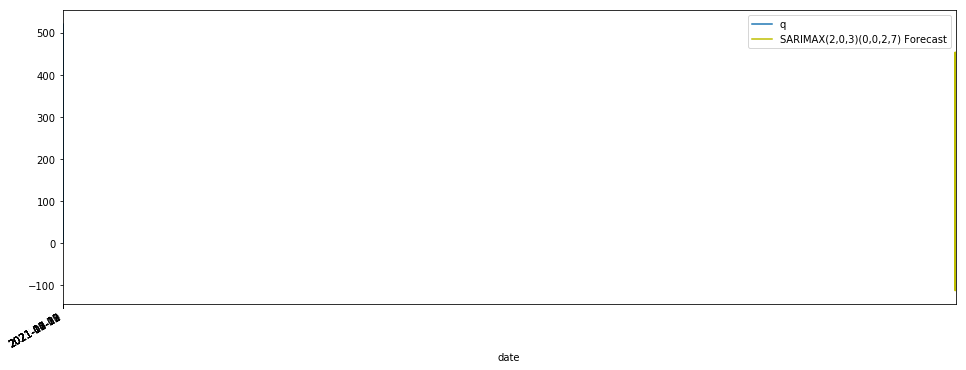

In [30]:
ax = test['q'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True,figsize=(16,6),c='y')
ax.autoscale(axis='x',tight=True)